# Homework

In [17]:
# Please implement 2 classes below

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target
X, y = shuffle(X, y, random_state=78)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.2)

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
# from scipy.stats import norm

In [21]:
class NaiveBayes:
    """
    Implement Naive Bayes algorithm (multiclass case). You can find necessary formula in the screenshot
    attached.

    2.1 You need to calculate prior probabilities (P(y=yk)) as described in the picture - the proportion of
    number of data points in your train data from class k divided by number of all data points in your train
    data.
    2.2 You need to calculate conditional probabilities by using PDF of the chosen distribution.
    2.3
    Question: What does it mean to fit a gaussian naive bayes model?
    Answer: As long as we are assuming that data comes from normal distributions (different for each class),
    fit method should include finding that distributions, namely, the means and variances for each.
    So, you need to divide data into parts, where in each part the label is fixed (first part - all 0 labels,
    second part - all 1 labels etc.) and find means and variances for each feature in each part. You will use
    this values in calculating conditional probabilities by PDF.
    2.4 You can replace product of probabilities by sum of its logarithm (you know this technique from cross
    entropy loss).
    """

    def __init__(self):
        self.X = None
        self.y = None
        self.means = None
        self.std = None
        self.classes = None

    def fit(self, X, y):
        self.X = X
        self.y = y

        self.classes = np.unique(self.y)
        self.classes.sort()

        self.__find_means_and_stds()

    def prior_probability(self, y_k):
        return len([y_i for y_i in self.y if y_i == y_k]) / len(self.y)

    @staticmethod
    def pdf_normal(x, mean, std):
         var = std ** 2
         return (1 / np.sqrt(2 * var * np.pi)) * np.exp(-(((x - mean) ** 2) / (2 * var)))


    def conditional_probability(self, x, y_k):
        result = np.ndarray(X.shape[1])

        for i, feature in enumerate(x.T):
            y_k_index = nb.classes[np.where(nb.classes == y_k)]
            result[i] = self.pdf_normal(feature, self.means[i, y_k_index], self.stds[i, y_k_index])

        return np.prod(result)

    def __find_means_and_stds(self):
        self.means = np.ndarray(shape=(self.X.shape[1], len(self.classes)))
        self.stds = np.ndarray(shape=(self.X.shape[1], len(self.classes)))

        for i, y_i in enumerate(self.classes):
            # for j, feature in enumerate(self.X.T):
            #     feature_if_y_i = feature[self.y == y_i]
            #     self.means[j, i] = feature_if_y_i.mean()
            #     self.stds[j, i] = feature_if_y_i.var()

            self.means[:, i] = self.X[self.y == y_i].mean(axis=0)
            self.stds[:, i] = self.X[self.y == y_i].var(axis=0)

    def predict(self, X):
        y_pred = []
        for i, x in enumerate(X):
            y_pred.append(np.argmax([self.prior_probability(y_k) * self.conditional_probability(x, y_k) for y_k in self.classes]))

        y_pred = np.array(y_pred)
        return y_pred

[1 2 2 2 1 2 0 1 1 2 2 2 0 2 0 2 2 1 0 1 2 0 2 0 1 0 1 0 2 2]


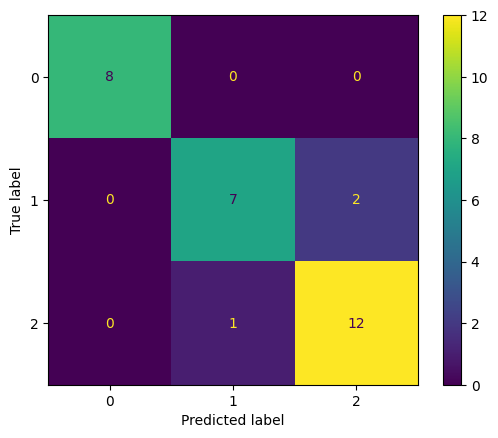

[1 2 2 2 1 2 0 1 1 2 2 2 0 2 0 2 2 1 0 1 2 0 2 0 1 0 1 0 2 2]


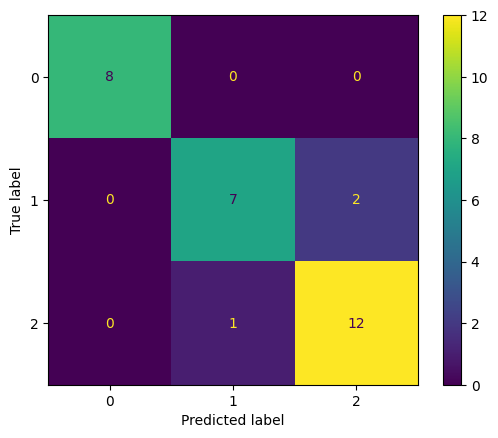

[1 2 2 2 1 2 0 1 1 2 2 2 0 2 0 2 2 1 0 1 2 0 2 0 1 0 1 0 2 2]


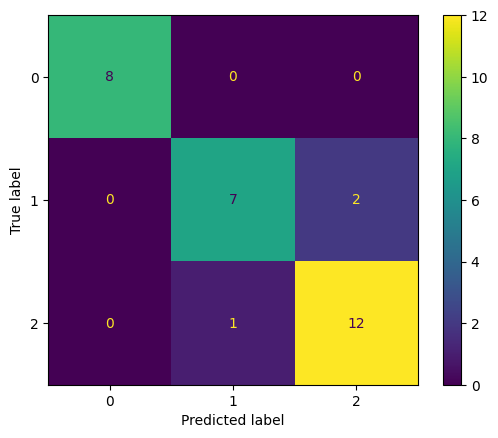

In [22]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [23]:
class LinearDiscriminantAnalysis:
    def __init__(self):
        self.X = None
        self.y = None
        self.means = None
        self.cov = None
        self.classes = None
        self.d = 0

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.d = self.X.shape[1]

        self.classes = np.unique(self.y)
        self.classes.sort()

        self.__find_means()
        self.__find_cov()

    def __find_means(self):
        self.means = np.ndarray(shape=(self.d, len(self.classes)))

        for i, y_i in enumerate(self.classes):
            self.means[:, i] = self.X[self.y == y_i].mean(axis=0)

    def __find_cov(self):
        self.cov = np.zeros(shape=(self.d, self.d))

        for i, y_i in enumerate(self.classes):
            self.cov += np.cov(self.X[self.y == y_i].T)


    def prior_probability(self, y_k):
        return len([y_i for y_i in self.y if y_i == y_k]) / len(self.y)

    def predict(self, X):
        y_pred = []
        for i, x in enumerate(X):
            y_pred.append(np.argmax([x.T.dot(np.linalg.inv(self.cov).dot(self.means[:, k])) - 0.5 * self.means[:, k].T.dot(np.linalg.inv(self.cov)).dot(self.means[:, k]) + np.log(self.prior_probability(y_k)) for k, y_k in enumerate(self.classes)]))

        y_pred = np.array(y_pred)
        return y_pred

[1 1 2 2 1 2 0 1 1 2 2 2 0 2 0 2 1 1 0 1 2 0 2 0 1 0 1 0 2 2]


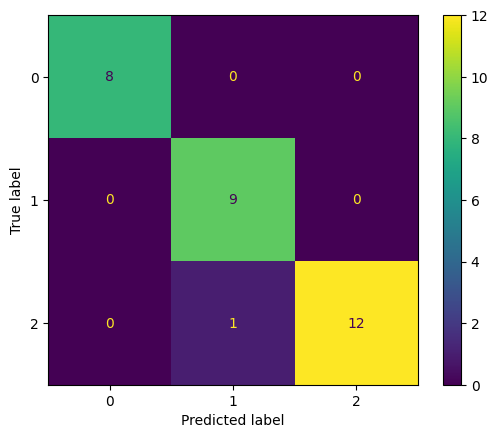

[1 1 2 2 1 2 0 1 1 2 2 2 0 2 0 2 1 1 0 1 2 0 2 0 1 0 1 0 2 2]


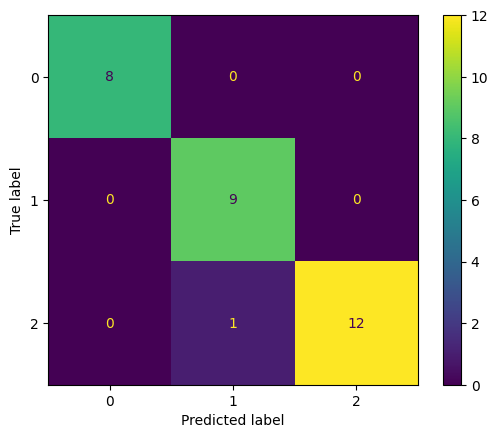

[1 1 2 2 1 2 0 1 1 2 2 2 0 2 0 2 1 1 0 1 2 0 2 0 1 0 1 0 2 2]


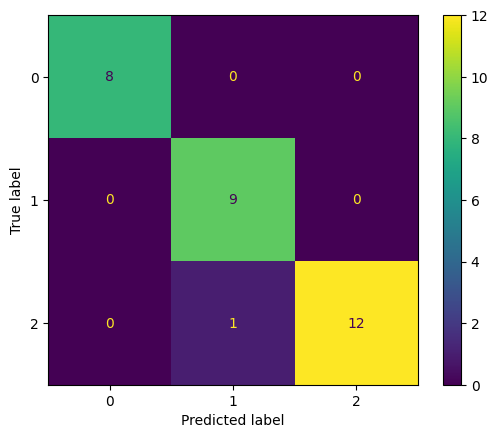

In [24]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
print(y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)